# Pre-procesamiento de datos

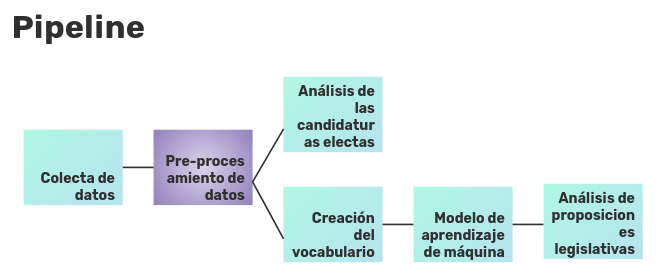

## Candidaturas elegidas

Principales transformaciones: 
- Selección de atributos
- Tratamiento de valores faltantes

In [1]:
import glob
import nltk
import re

import pandas as pd

from string import punctuation

In [2]:
df_deputadas_1934_2023 = pd.read_csv('dados/deputadas_1934_2023.csv')

In [3]:
df_deputadas_1934_2023.shape

(10745, 10)

In [4]:
df_deputadas_1934_2023.head(5)

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email,sexo
0,215044,https://dadosabertos.camara.leg.br/api/v2/depu...,Vivi Reis,PSOL,https://dadosabertos.camara.leg.br/api/v2/part...,PA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.vivireis@camara.leg.br,F
1,178862,https://dadosabertos.camara.leg.br/api/v2/depu...,Tia Eron,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.tiaeron@camara.leg.br,F
2,204466,https://dadosabertos.camara.leg.br/api/v2/depu...,Tereza Nelma,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,AL,56,https://www.camara.leg.br/internet/deputado/ba...,dep.terezanelma@camara.leg.br,F
3,178901,https://dadosabertos.camara.leg.br/api/v2/depu...,Tereza Cristina,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,MS,56,https://www.camara.leg.br/internet/deputado/ba...,NaN,F
4,204464,https://dadosabertos.camara.leg.br/api/v2/depu...,Talíria Petrone,PSOL,https://dadosabertos.camara.leg.br/api/v2/part...,RJ,56,https://www.camara.leg.br/internet/deputado/ba...,dep.taliriapetrone@camara.leg.br,F


<div class="alert-warning"> Candidaturas elegidas: Selección de atributos para análisis </div>

In [5]:
df_deputadas = df_deputadas_1934_2023[['id', 'siglaPartido', 'siglaUf',
       'idLegislatura', 'sexo']]

In [6]:
df_deputadas.head(5)

,id,siglaPartido,siglaUf,idLegislatura,sexo
0,215044,PSOL,PA,56,F
1,178862,REPUBLICANOS,BA,56,F
2,204466,PSDB,AL,56,F
3,178901,UNIÃO,MS,56,F
4,204464,PSOL,RJ,56,F


<div class="alert-warning"> Candidaturas elegidas: Ajuste de los valores faltantes </div>

In [7]:
df_deputadas.isnull().sum(axis = 0)

id                 0
siglaPartido     278
siglaUf            0
idLegislatura      0
sexo               0
dtype: int64

In [8]:
df_deputadas['siglaPartido'].fillna('sem partido', inplace=True)

/home/cecivieira/Projetos/cotas-genero-e-proposicoes-legislativas/.venv/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
df_deputadas.isnull().sum(axis = 0)

id               0
siglaPartido     0
siglaUf          0
idLegislatura    0
sexo             0
dtype: int64

In [10]:
df_deputadas.to_csv('dados/candidaturas_eleitas(1).csv', index=False)

## Legislaturas

Principales tranformaciones:
- Convertir fecha completa en año

In [11]:
tipo_data = ['dataInicio', 'dataFim']
df_legislaturas = pd.read_csv('dados/legislaturas_1934_2023.csv', parse_dates=tipo_data)

In [12]:
df_legislaturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          21 non-null     int64         
 1   uri         21 non-null     object        
 2   dataInicio  21 non-null     datetime64[ns]
 3   dataFim     21 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 800.0+ bytes


In [13]:
df_legislaturas.head()

,id,uri,dataInicio,dataFim
0,56,https://dadosabertos.camara.leg.br/api/v2/legi...,2019-02-01,2023-01-31
1,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31
2,54,https://dadosabertos.camara.leg.br/api/v2/legi...,2011-02-01,2015-01-31
3,53,https://dadosabertos.camara.leg.br/api/v2/legi...,2007-02-01,2011-01-31
4,52,https://dadosabertos.camara.leg.br/api/v2/legi...,2003-02-01,2007-01-31


<div class="alert-warning"> Legislaturas: extracción de año </div>

In [14]:
df_legislaturas['dataInicio'] = df_legislaturas['dataInicio'].dt.year

In [15]:
df_legislaturas['dataFim'] = df_legislaturas['dataFim'].dt.year

In [16]:
df_legislaturas.head()

,id,uri,dataInicio,dataFim
0,56,https://dadosabertos.camara.leg.br/api/v2/legi...,2019,2023
1,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015,2019
2,54,https://dadosabertos.camara.leg.br/api/v2/legi...,2011,2015
3,53,https://dadosabertos.camara.leg.br/api/v2/legi...,2007,2011
4,52,https://dadosabertos.camara.leg.br/api/v2/legi...,2003,2007


In [17]:
df_legislaturas.to_csv('dados/legislaturas_1934_2023_limpas(1).csv', index=False)

## Proposiciones legislativas

Principales transformaciones:
- Selección de los tipos de propuestas legislativas deseadas
- Selección de atributos
- Ajustes de valores faltantes
- Extracción de palabras claves de las ementas
    - Remoción de stopwords, meses, puntuación, números
    - Remoción de palabras con menos de 3 caracteres y semanticamente irrelevantes
    - Remoción de bigramas semanticamente irrelevantes

In [18]:
lista_proposicoes = glob.glob('dados/proposicoes/propo*')

In [19]:
tipos_dados = {
    'id': object,
    'uri': object,
    'siglaTipo': object,
    'numero': object,
    'ano': int,
    'codTipo': object,
    'descricaoTipo': object,
    'ementa': object,
    'ementaDetalhada': object,
    'keywords': object,   
    'uriOrgaoNumerador': object,
    'uriPropAnterior': object,
    'uriPropPrincipal': object,
    'uriPropPosterior': object,
    'urlInteiroTeor': object, 
    'urnFinal': object, 
    'ultimoStatus_sequencia': object,
    'ultimoStatus_uriRelator': object, 
    'ultimoStatus_idOrgao': object,
    'ultimoStatus_siglaOrgao': object, 
    'ultimoStatus_uriOrgao': object,
    'ultimoStatus_regime': object, 
    'ultimoStatus_descricaoTramitacao': object,
    'ultimoStatus_idTipoTramitacao': object, 
    'ultimoStatus_descricaoSituacao': object,
    'ultimoStatus_idSituacao': object, 
    'ultimoStatus_despacho': object, 
    'ultimoStatus_url': object
}

tipo_data = ['dataApresentacao', 'ultimoStatus_dataHora']

In [20]:
lista_df = []

for proposicao in lista_proposicoes:
    df_proposicao = pd.read_csv(proposicao, sep=';', dtype=tipos_dados, parse_dates=tipo_data)
    lista_df.append(df_proposicao)

In [21]:
df_proposicao_1934_2021 = pd.concat(lista_df, axis=0, ignore_index=True)
df_proposicao_1934_2021.shape

(680358, 30)

<div class="alert-warning"> Proposiciones legislativas: Selección de los tipos de propuestas legislativas </div>

- Projeto de Decreto Legislativo [SF] (PDL)
- Projeto de Decreto Legislativo [CD] (PDC)
- Projeto de Decreto Legislativo [CN] (PDN)
- Projeto de Decreto Legislativo [SF] (PDS)
- Proposta de Emenda à Constituição (PEC)
- Projeto de Lei (PL)
- Projeto de Lei da Câmara (PLC)
- Projeto de Lei Complementar (PLP)
- Projeto de Lei de Conversão (PLV)
- Projeto de Resolução da Câmara dos Deputados (PRC)

In [22]:
tipos_proposicoes = ['PDS', 'PDC', 'PDN', 'PEC', 'PL', 'PLC', 'PLP', 'PLV', 'PRC']

In [23]:
df_proposicoes_tipos_desejados = df_proposicao_1934_2021[df_proposicao_1934_2021['siglaTipo'].isin(tipos_proposicoes)].copy()

In [24]:
df_proposicoes_tipos_desejados.shape

(152424, 30)

<div class="alert-warning"> Proposiciones legislativas: Selección de atributos para análisis </div>

In [25]:
df_proposicoes = df_proposicoes_tipos_desejados[['id','siglaTipo','ano', 'codTipo', 'descricaoTipo',
       'ementa', 'ementaDetalhada', 'keywords']].copy()

In [26]:
df_proposicoes.shape

(152424, 8)

<div class="alert-warning"> Proposiciones legislativas: Ajuste de valores faltantes </div>

In [27]:
df_proposicoes.isnull().sum(axis = 0)

id                      0
siglaTipo               0
ano                     0
codTipo                 0
descricaoTipo           0
ementa                  5
ementaDetalhada    109844
keywords              924
dtype: int64

In [28]:
df_proposicoes[
    (df_proposicoes['ementa'].isnull()) & 
    (df_proposicoes['ementaDetalhada'].isnull()) & 
    (df_proposicoes['keywords'].isnull())].head()

,id,siglaTipo,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords
59695,537493,PL,1946,139,Projeto de Lei,NaN,NaN,NaN
71533,347964,PL,1935,139,Projeto de Lei,NaN,NaN,NaN
424157,2123532,PLC,2017,465,Projeto de Lei da Câmara dos Deputados (SF),NaN,NaN,NaN
495917,2308959,PLV,2021,390,Projeto de Lei de Conversão,NaN,NaN,NaN
571961,605771,PL,1954,139,Projeto de Lei,NaN,NaN,NaN


In [29]:
df_proposicoes.dropna(axis=0, subset=['ementa'], inplace=True)

In [30]:
df_proposicoes.shape

(152419, 8)

<div class="alert-warning"> Proposiciones legislativas: Normalización de las keywords existentes </div>

In [31]:
df_proposicoes_com_keywords = df_proposicoes[df_proposicoes['keywords'].notna()].copy()

In [32]:
df_proposicoes[df_proposicoes['keywords'].notna()]

,id,siglaTipo,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords
105,168293,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM DECISÃO DENEGATORIA DO TRIBUNAL DE CONT...,NaN,"MANUTENÇÃO, DECISÃO, TRIBUNAL DE CONTAS DA UNI..."
106,168297,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM ATO DO TRIBUNAL DE CONTAS DA UNIÃO DE R...,NaN,"MANUTENÇÃO, ATO, TRIBUNAL DE CONTAS DA UNIÃO (..."
107,168300,PDC,1965,135,Projeto de Decreto Legislativo,MANTÉM DECISÃO DENEGATÓRIA DO TRIBUNAL DE CONT...,NaN,"MANUTENÇÃO, DECISÃO, TRIBUNAL DE CONTAS DA UNI..."
108,168303,PDC,1965,135,Projeto de Decreto Legislativo,MANTÉM ATO DO TRIBUNAL DE CONTAS DA UNIÃO QUE ...,NaN,"MANUTENÇÃO, ATO, TRIBUNAL DE CONTAS DA UNIÃO (..."
109,168307,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM O ATO DO TRIBUNAL DE CONTAS DA UNIÃO QU...,NaN,"MANUTENÇÃO, ATO, TRIBUNAL DE CONTAS DA UNIÃO (..."
...,...,...,...,...,...,...,...,...
680339,235344,PRC,1963,141,Projeto de Resolução,AUTORIZA A MESA DA CAMARA DOS DEPUTADOS A EDIT...,NaN,"AUTORIZAÇÃO, MESA DIRETORA, CAMARA DOS DEPUTAD..."
680340,235359,PRC,1963,141,Projeto de Resolução,CRIA COMISSÃO MISTA PARA APRECIAR AS MENSAGENS...,NaN,"CRIAÇÃO, COMISSÃO MISTA, APRECIAÇÃO, MENSAGEM ..."
680341,235375,PRC,1963,141,Projeto de Resolução,PROPÕE MEDIDAS PRELIMINARES PARA A CRIAÇÃO DO ...,NaN,"NORMAS, PROPOSTA, PRELIMINAR, CRIAÇÃO, PARLAME..."
680342,454146,PDC,1963,135,Projeto de Decreto Legislativo,APROVA A CONVENÇÃO SOBRE ASSISTÊNCIA JUDICIÁRI...,NaN,"APROVAÇÃO, ATO INTERNACIONAL, CONVENÇÃO INTERN..."


In [33]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/cecivieira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cecivieira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<div class="alert-warning"> Proposiciones legislativas: Funcciones para borrar la puntuación, preposiciones, números y artículos</div>

In [34]:
meses = ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho','agosto', 'setembro', 'outubro', 'novembro', 'dezembro']

In [35]:
def define_stopwords_punctuation():
    stopwords = nltk.corpus.stopwords.words('portuguese') + meses
    pontuacao = list(punctuation)
    stopwords.extend(pontuacao)
    return stopwords

In [36]:
def remove_stopwords_punctuation_da_sentenca(texto):
    padrao_digitos = r'[0-9]'
    texto = re.sub(padrao_digitos, '', texto)
    palavras = nltk.tokenize.word_tokenize(texto.lower())
    stopwords = define_stopwords_punctuation()
    keywords = [palavra for palavra in palavras if palavra not in stopwords]
    return keywords

In [37]:
df_proposicoes_com_keywords['keywords'] = df_proposicoes_com_keywords['keywords'].apply(remove_stopwords_punctuation_da_sentenca)

In [38]:
def converte_lista_string(lista):
    return ','.join([palavra for palavra in lista])

In [39]:
df_proposicoes_com_keywords['keywords'] = df_proposicoes_com_keywords['keywords'].apply(converte_lista_string)

<div class="alert-warning"> Proposiciones legislativas: Borra las proposiciones que quedaron sin keywords despues de la limpieza</div>

In [40]:
df_proposicoes_com_keywords = df_proposicoes_com_keywords[df_proposicoes_com_keywords['keywords'] != '']

In [41]:
df_proposicoes_com_keywords.head()

,id,siglaTipo,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords
105,168293,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM DECISÃO DENEGATORIA DO TRIBUNAL DE CONT...,NaN,"manutenção,decisão,tribunal,contas,união,tcu,d..."
106,168297,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM ATO DO TRIBUNAL DE CONTAS DA UNIÃO DE R...,NaN,"manutenção,ato,tribunal,contas,união,tcu,recus..."
107,168300,PDC,1965,135,Projeto de Decreto Legislativo,MANTÉM DECISÃO DENEGATÓRIA DO TRIBUNAL DE CONT...,NaN,"manutenção,decisão,tribunal,contas,união,tcu,d..."
108,168303,PDC,1965,135,Projeto de Decreto Legislativo,MANTÉM ATO DO TRIBUNAL DE CONTAS DA UNIÃO QUE ...,NaN,"manutenção,ato,tribunal,contas,união,tcu,negaç..."
109,168307,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM O ATO DO TRIBUNAL DE CONTAS DA UNIÃO QU...,NaN,"manutenção,ato,tribunal,contas,união,tcu,deneg..."


<div class="alert-warning"> Proposiciones legislativas: Saca `keywords` de la columna `ementa` </div>

In [42]:
df_proposicoes_sem_keywords = df_proposicoes[df_proposicoes['keywords'].isna()].copy()

In [43]:
df_proposicoes_sem_keywords['keywords'] = df_proposicoes_sem_keywords['ementa'].apply(remove_stopwords_punctuation_da_sentenca)

In [44]:
lista_keywords = []
lista_keywords_temp = df_proposicoes_sem_keywords['keywords'].tolist()
_ = [lista_keywords.extend(item) for item in lista_keywords_temp]

In [45]:
palavras_para_descarte = [item for item in set(lista_keywords) if len(item) <= 3]

In [46]:
substantivos_nao_descartaveis = ['cão', 'mãe', 'oab', 'boa', 'pré', 'voz', 'rui', 'uva', 'gás', 'glp', 'apa']

In [47]:
palavras_para_descarte_refinada = [palavra for palavra in palavras_para_descarte if palavra not in substantivos_nao_descartaveis]

In [48]:
def remove_palavras_para_descarte_da_sentenca(texto):
    keywords = []
    for palavra in texto:
        if palavra not in palavras_para_descarte_refinada:
            keywords.append(palavra)
    return keywords

In [49]:
df_proposicoes_sem_keywords['keywords'] = df_proposicoes_sem_keywords['keywords'].apply(remove_palavras_para_descarte_da_sentenca)

<div class="alert-warning"> Proposiciones legislativas: Tratamiento de bigramas </div>

In [50]:
def gera_n_grams(texto, ngram=2):
    temporario = zip(*[texto[indice:] for indice in range(0,ngram)])
    resultado = [' '.join(ngram) for ngram in temporario]
    return resultado

In [51]:
df_proposicoes_sem_keywords['bigrams'] = df_proposicoes_sem_keywords['keywords'].apply(gera_n_grams)

In [52]:
lista_ngrams = []
lista_ngrams_temp = df_proposicoes_sem_keywords['bigrams'].tolist()
_ = [lista_ngrams.extend(item) for item in lista_ngrams_temp]

In [53]:
bigrams_comuns = nltk.FreqDist(lista_ngrams).most_common(50)

In [54]:
lista_bigramas_comuns = [bigrama for bigrama, frequencia in bigrams_comuns]

<div class="alert-warning"> Proposiciones legislativas: Selección de los bigramas semanticamente irrelevantes </div>

In [55]:
lista_bigramas_comuns_limpa = ['dispõe sobre', 'outras providências', 'nova redação', 'poder executivo', 'distrito federal',
 'autoriza poder', 'federal outras','redação constituição', 'dispõe sôbre', 'código penal', 'artigo constituição',
 'disposições constitucionais', 'altera dispõe', 'decreto-lei código', 'constitucionais transitórias', 'altera redação',
 'abre ministério', 'executivo abrir', 'redação artigo', 'sobre criação', 'acrescenta parágrafo', 'parágrafo único',
 'concede isenção', 'altera dispositivos', 'altera complementar', 'dispondo sobre', 'código processo', 'outras providências.',
 'providências. historico', 'ministério fazenda', 'altera leis', 'programa nacional', 'quadro permanente', 'outras providencias',
 'inciso constituição', 'abrir ministério', 'estabelece normas', 'ministério justiça', 'tempo serviço', 'instituto nacional',
 'institui sistema', 'operações crédito', 'altera institui', 'dispõe sôbre']

In [56]:
palavras_para_descarte_origem_bigramas = []
_ = [palavras_para_descarte_origem_bigramas.extend(bigrama.split(' ')) for bigrama in lista_bigramas_comuns_limpa]
palavras_para_descarte_origem_bigramas_unicas = set(palavras_para_descarte_origem_bigramas)

In [57]:
def remove_palavras_origem_bigramas_da_sentenca(texto):
    keywords = []
    for palavra in texto:
        if palavra not in palavras_para_descarte_origem_bigramas_unicas:
            keywords.append(palavra)
    return keywords

In [58]:
df_proposicoes_sem_keywords['keywords'] = df_proposicoes_sem_keywords['keywords'].apply(remove_palavras_origem_bigramas_da_sentenca)

In [59]:
df_proposicoes_sem_keywords['keywords'] = df_proposicoes_sem_keywords['keywords'].apply(converte_lista_string)

In [60]:
df_proposicoes_sem_keywords = df_proposicoes_sem_keywords.drop(columns=['bigrams'])

<div class="alert-warning"> Proposiciones legislativas: Borra las proposiciones que quedaron sin keywords despues de la limpieza</div>

In [61]:
df_proposicoes_sem_keywords = df_proposicoes_sem_keywords[df_proposicoes_sem_keywords['keywords'] != '']

In [62]:
df_proposicoes_sem_keywords[df_proposicoes_sem_keywords['keywords']== ''] 

,id,siglaTipo,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords


<div class="alert-warning"> Proposiciones legislativas: Reuni los dataframes</div>

In [63]:
df_proposicoes_v_final = pd.concat([df_proposicoes_com_keywords, df_proposicoes_sem_keywords])

In [64]:
df_proposicoes_v_final.shape

(152386, 8)

In [65]:
df_proposicoes_v_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152386 entries, 105 to 680357
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               152386 non-null  object
 1   siglaTipo        152386 non-null  object
 2   ano              152386 non-null  int64 
 3   codTipo          152386 non-null  object
 4   descricaoTipo    152386 non-null  object
 5   ementa           152386 non-null  object
 6   ementaDetalhada  42563 non-null   object
 7   keywords         152386 non-null  object
dtypes: int64(1), object(7)
memory usage: 10.5+ MB


In [66]:
df_proposicoes_v_final.to_csv('dados/proposicoes_legislativas_limpas(1).csv', index=False)

# Creación de vocabulario

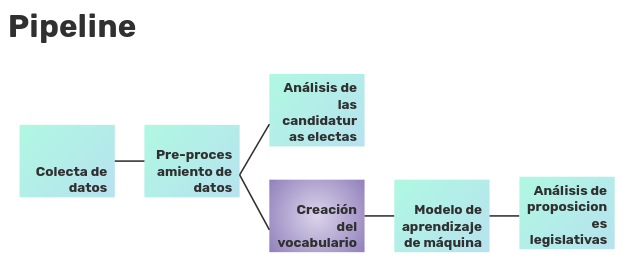

Antes de hacer el análisis de los temas de las proposiciones hacía falta clasificarlas con un vocabulario controlado. Así que, usando el conjunto de datos "temas de proposições" clasifiqué algunas proposiciones relativas a protección de derechos de grupos históricamente marginados, a saber: campesinos, mujeres, población LGTQIA+, negros, ancianos, discapacitados, artistas, poblaciones económicamente vulnerables y pueblos indígenas.

Principales etapas:
- Reunir todas las palabras claves
- Atribuir manualmente palabras a temas
- Atribuir tema a proposiciones que contenía la palabra clave

In [67]:
proposicoes = pd.read_csv('dados/proposicoes_legislativas_limpas(1).csv')

In [68]:
proposicoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152386 entries, 0 to 152385
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               152386 non-null  int64 
 1   siglaTipo        152386 non-null  object
 2   ano              152386 non-null  int64 
 3   codTipo          152386 non-null  int64 
 4   descricaoTipo    152386 non-null  object
 5   ementa           152386 non-null  object
 6   ementaDetalhada  42563 non-null   object
 7   keywords         152386 non-null  object
dtypes: int64(3), object(5)
memory usage: 9.3+ MB


Reunião de palavras chaves para classificação

In [69]:
keywords = proposicoes['keywords']

In [70]:
vocabulario = []

In [71]:
for proposicao in keywords:
    lista = proposicao.split(',')
    vocabulario.extend(lista)

In [72]:
vocabulario_unico = set(vocabulario)

In [73]:
with open('dados/vocabulario.txt', 'w') as palavras:
        for termo in vocabulario_unico:
            palavras.write(termo + '\n')

<div class="alert-warning">Relacioné manualmente palabras claves a uno de los temas del conjunto de datos "Temas"</div>

In [74]:
vocabulario_temp = pd.read_csv('dados/temas_vocabulario.csv')

In [75]:
vocabulario_temp.head()

,cod,sigla,nome,descricao
0,34,NaN,Administração Pública,NaN
1,64,NaN,"Agricultura, Pecuária, Pesca e Extrativismo",assentado assentados assentamento assentamento...
2,35,NaN,"Arte, Cultura e Religião",territporios obra-de-arte histórico-cultural a...
3,41,NaN,Cidades e Desenvolvimento Urbano,natalidade pacificação
4,62,NaN,"Ciência, Tecnologia e Inovação",NaN


<div class="alert-warning"> Crié el vocabuario</div>

In [76]:
vocabulario = pd.DataFrame(columns=['cod', 'tema', 'palavra_chave'])

In [77]:
indices = vocabulario_temp.index

In [78]:
for indice in indices:
    descricao = vocabulario_temp['descricao'].iloc[indice]
    if type(descricao) == str:
        for palavra in descricao.split(' '):
            df = pd.DataFrame(data={'cod':vocabulario_temp['cod'].iloc[indice], 'tema':vocabulario_temp['nome'].iloc[indice], 'palavra_chave':[palavra]})
            vocabulario = pd.concat([vocabulario, df], ignore_index=True)
        

In [79]:
vocabulario.sample(5)

,cod,tema,palavra_chave
6,64,"Agricultura, Pecuária, Pesca e Extrativismo",camponesas
17,35,"Arte, Cultura e Religião",audiovisual
126,44,Direitos Humanos e Minorias,homotransfobia
66,43,Direito Penal e Processual Penal,carcere
110,44,Direitos Humanos e Minorias,apartheid


In [80]:
vocabulario.shape

(412, 3)

In [81]:
vocabulario = vocabulario[vocabulario['palavra_chave']!= ''].copy()
vocabulario.shape

(411, 3)

<div class="alert-warning">Atribuí el tema a las proposiciones que contenía la palabra en la columna `keyword`</div>

In [82]:
def atribui_tema(proposicao):
    for tema, palavra_chave in zip(vocabulario['tema'], vocabulario['palavra_chave']):
        if palavra_chave in proposicao:
            return tema

In [83]:
proposicoes['temas'] = proposicoes['keywords'].apply(atribui_tema)

In [84]:
proposicoes.to_csv('dados/proposicoes_legislativas_limpas_vocabulario(1).csv', index=False)

# Modelo de aprendizaje de máquina

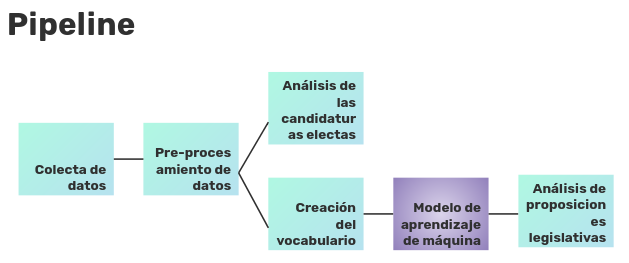

Hay que clasificar todas las proposiciones antes del análisis.

Principales etapas:
- Establece variable predictora: “ementa” y la de respuesta:"temas"
- Encode da variable de respuesta utilizando preprocessing.LabelEncoder
- Divide conjunto de datos para teste y entrenamiento
- Convierte las ementas en vectores con HashingVectorizer
- Crea el modelo de clasificación con RandomForestClassifier
- Entrena el modelo
- Evalua cualitativamente a partir de la comparación entre las clasificaciones de los conjuntos de prueba y entrenamiento

Al final tenemos clasificadas solamente las proposiciones referentes a temática estudiada

In [85]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from keras.utils import np_utils

import nltk
from nltk.corpus import stopwords

import pandas as pd
import numpy as np

2022-04-25 13:48:02.294118: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-25 13:48:02.294190: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<div class="alert-warning">Classifica proposições legislativas</div>

In [86]:
df_proposicoes = pd.read_csv("dados/proposicoes_legislativas_limpas_vocabulario(1).csv")
df_proposicoes_classificado = df_proposicoes.dropna(subset=["temas"])
df_proposicoes_classificado = df_proposicoes_classificado[["ementa","temas"]]

In [87]:
df_proposicoes_classificado.shape

(20210, 2)

In [88]:
df_proposicoes_classificado.head()

,ementa,temas
62,PROIBE O EMPREGO DE EXPRESSÕES DESAIROSAS AO H...,Direitos Humanos e Minorias
67,"ESTABELECE O REGIME DE APOSENTADORIA ESPECIAL,...",Trabalho e Emprego
71,"REVOGA A LEI 3841, DE 15 DE DEZEMBRO DE 1960, ...",Trabalho e Emprego
81,DEFINE O PEQUENO PRODUTOR E DA OUTRAS PROVIDEN...,Trabalho e Emprego
96,TRANSFORMA EM APOSENTADORIAS AS DEMISSÕES DE S...,Trabalho e Emprego


<div class="alert-warning">Establece variable predictora: “ementa” y la de respuesta:"temas"</div>

In [89]:
sentences = df_proposicoes_classificado['ementa'].values

<div class="alert-warning">Encode da variable de respuesta</div>

In [90]:
le = preprocessing.LabelEncoder()
le.fit(df_proposicoes_classificado['temas'].unique())

y = le.transform(df_proposicoes_classificado['temas'])

<div class="alert-warning">Divide el conjunto de teste y entrenamiento</div>

In [91]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
   sentences, y, test_size=0.25, random_state=1000)

<div class="alert-warning">Convierte las ementas en vectores con HashingVectorizer</div>

In [92]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

hasher = HashingVectorizer(
            n_features=10000,
            stop_words=stopwords.words('portuguese'),
            alternate_sign=False,
            norm=None,
        )
hasher.fit(sentences_train)
X_train_hasher = hasher.transform(sentences_train)
X_test_hasher = hasher.transform(sentences_test)

In [93]:
X_train_hasher.shape

(15157, 10000)

<div class="alert-warning">Cría y entreina clasificador</div>

In [94]:
clf = RandomForestClassifier(n_estimators=200,random_state=0)
clf.fit(X_train_hasher, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

<div class="alert-warning">Verifica el coeficiente de determinación (R²)</div>

In [95]:
score = clf.score(X_test_hasher, y_test)

print("Acurácia:", score)

Acurácia: 0.7920047496536711


<div class="alert-warning">Avalia modelo cualitativamente</div>

In [96]:
df_random_forest_results = pd.DataFrame([sentences_test,le.inverse_transform(clf.predict(X_test_hasher))]).transpose().rename(columns={0:"ementa",1:"tema"})
df_random_forest_results.head()

,ementa,tema
0,"Altera a Lei nº 10.098, de 19 de dezembro de 2...",Direito Civil e Processual Civil
1,"Altera o art. 6º da Lei nº 10.826, de 22 de de...",Direito Penal e Processual Penal
2,"AUTORIZA O PODER EXECUTIVO A ABRIR, PELO MINIS...",Direitos Humanos e Minorias
3,Cria mecanismos para coibir a violência e a di...,Direitos Humanos e Minorias
4,ASSEGURA AOS FUNCIONARIOS PUBLICOS CIVIS DA UN...,Trabalho e Emprego


<div class="alert-warning">Cría listado con probabilidades de clasificación de la proposición en cada tema</div>

In [97]:
predicted_probabilities = clf.predict_proba(X_test_hasher)

<div class="alert-warning">Selecciona el tema con mayor probabilidad para cada proposición</div>

In [98]:
df_random_forest_results["probabilidade_predicao"] = np.amax(predicted_probabilities,axis=1)

In [99]:
df_random_forest_results.head()

,ementa,tema,probabilidade_predicao
0,"Altera a Lei nº 10.098, de 19 de dezembro de 2...",Direito Civil e Processual Civil,0.865
1,"Altera o art. 6º da Lei nº 10.826, de 22 de de...",Direito Penal e Processual Penal,1.000
2,"AUTORIZA O PODER EXECUTIVO A ABRIR, PELO MINIS...",Direitos Humanos e Minorias,0.945
3,Cria mecanismos para coibir a violência e a di...,Direitos Humanos e Minorias,0.960
4,ASSEGURA AOS FUNCIONARIOS PUBLICOS CIVIS DA UN...,Trabalho e Emprego,0.925


<div class="alert-warning">Cría dataframe comparativo entre los temas preestablecidos y los clasificados por el clasificador</div>

In [100]:
df_ementas_test = pd.DataFrame([sentences_test,le.inverse_transform(y_test)]).transpose().rename(columns={0:"ementa",1:"tema"})

In [101]:
df_ementas_test.head()

,ementa,tema
0,"Altera a Lei nº 10.098, de 19 de dezembro de 2...",Direito Civil e Processual Civil
1,"Altera o art. 6º da Lei nº 10.826, de 22 de de...",Direito Penal e Processual Penal
2,"AUTORIZA O PODER EXECUTIVO A ABRIR, PELO MINIS...",Direitos Humanos e Minorias
3,Cria mecanismos para coibir a violência e a di...,Direitos Humanos e Minorias
4,ASSEGURA AOS FUNCIONARIOS PUBLICOS CIVIS DA UN...,Trabalho e Emprego


In [102]:
df_avaliacao = df_random_forest_results.merge(df_ementas_test,left_on="ementa",right_on="ementa",suffixes=["_resposta_modelo","_correto"])
df_avaliacao["modelo_acertou"] = df_avaliacao["tema_resposta_modelo"] == df_avaliacao["tema_correto"]
df_avaliacao["modelo_acertou"] = df_avaliacao["modelo_acertou"].replace({True: "Sim", False: "Não"})

In [103]:
df_avaliacao["modelo_acertou"].value_counts()

Sim    4148
Não    1079
Name: modelo_acertou, dtype: int64

<div class="alert-warning">Resumen de la validación</div>

In [104]:
df_avaliacao[df_avaliacao["probabilidade_predicao"] >= 0.85]["modelo_acertou"].value_counts()

Sim    1696
Não      58
Name: modelo_acertou, dtype: int64

In [105]:
df_avaliacao.head()

,ementa,tema_resposta_modelo,probabilidade_predicao,tema_correto,modelo_acertou
0,"Altera a Lei nº 10.098, de 19 de dezembro de 2...",Direito Civil e Processual Civil,0.865,Direito Civil e Processual Civil,Sim
1,"Altera o art. 6º da Lei nº 10.826, de 22 de de...",Direito Penal e Processual Penal,1.000,Direito Penal e Processual Penal,Sim
2,"AUTORIZA O PODER EXECUTIVO A ABRIR, PELO MINIS...",Direitos Humanos e Minorias,0.945,Direitos Humanos e Minorias,Sim
3,Cria mecanismos para coibir a violência e a di...,Direitos Humanos e Minorias,0.960,Direitos Humanos e Minorias,Sim
4,ASSEGURA AOS FUNCIONARIOS PUBLICOS CIVIS DA UN...,Trabalho e Emprego,0.925,Trabalho e Emprego,Sim


In [106]:
df_ementas_test.tema.value_counts()

Direitos Humanos e Minorias                    2334
Trabalho e Emprego                             1344
Saúde                                           333
Arte, Cultura e Religião                        265
Direito Penal e Processual Penal                191
Previdência e Assistência Social                163
Educação                                        140
Direito Civil e Processual Civil                121
Agricultura, Pecuária, Pesca e Extrativismo      86
Cidades e Desenvolvimento Urbano                 39
Relações Internacionais e Comércio Exterior      16
Viação, Transporte e Mobilidade                  13
Meio Ambiente e Desenvolvimento Sustentável       6
Homenagens e Datas Comemorativas                  1
Economia                                          1
Name: tema, dtype: int64

In [107]:
df_avaliacao.to_csv('dados/avaliacao-qualitativa-modelo-classificacao(1).csv')

<div class="alert-warning">Aplicación del modelo</div>

In [108]:
df_proposicoes_total = df_proposicoes[["ementa","temas"]]

In [109]:
ementas = df_proposicoes_total['ementa'].values

In [110]:
ementas_hasher = hasher.transform(ementas)

In [111]:
df_proposicoes_total_classificadas = pd.DataFrame([ementas,le.inverse_transform(clf.predict(ementas_hasher))]).transpose().rename(
    columns={0:"ementa",1:"temas"})

In [112]:
df_proposicoes_total_classificadas.head()

,ementa,temas
0,MANTEM DECISÃO DENEGATORIA DO TRIBUNAL DE CONT...,Direitos Humanos e Minorias
1,MANTEM ATO DO TRIBUNAL DE CONTAS DA UNIÃO DE R...,Direitos Humanos e Minorias
2,MANTÉM DECISÃO DENEGATÓRIA DO TRIBUNAL DE CONT...,Direitos Humanos e Minorias
3,MANTÉM ATO DO TRIBUNAL DE CONTAS DA UNIÃO QUE ...,Direitos Humanos e Minorias
4,MANTEM O ATO DO TRIBUNAL DE CONTAS DA UNIÃO QU...,Direitos Humanos e Minorias


In [113]:
df_proposicoes_total_classificadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152386 entries, 0 to 152385
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ementa  152386 non-null  object
 1   temas   152386 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


Informar a probabilidade de acerto de cada tema

In [114]:
temas_probabilities = clf.predict_proba(ementas_hasher)

In [115]:
df_proposicoes_total_classificadas["probabilidade_predicao"] = np.amax(temas_probabilities, axis=1)

In [116]:
df_proposicoes_total_classificadas.head()

,ementa,temas,probabilidade_predicao
0,MANTEM DECISÃO DENEGATORIA DO TRIBUNAL DE CONT...,Direitos Humanos e Minorias,0.7600
1,MANTEM ATO DO TRIBUNAL DE CONTAS DA UNIÃO DE R...,Direitos Humanos e Minorias,0.5050
2,MANTÉM DECISÃO DENEGATÓRIA DO TRIBUNAL DE CONT...,Direitos Humanos e Minorias,0.7750
3,MANTÉM ATO DO TRIBUNAL DE CONTAS DA UNIÃO QUE ...,Direitos Humanos e Minorias,0.7150
4,MANTEM O ATO DO TRIBUNAL DE CONTAS DA UNIÃO QU...,Direitos Humanos e Minorias,0.4725


In [117]:
df_proposicoes_total_classificadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152386 entries, 0 to 152385
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ementa                  152386 non-null  object 
 1   temas                   152386 non-null  object 
 2   probabilidade_predicao  152386 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.5+ MB


Limpa temas cuja a probabilidade de acerto é menor do que 85%

In [118]:
def retira_tema_com_baixa_probabilidade_acerto(proposicoes):
        if proposicoes['probabilidade_predicao'] >= 0.85:
            return proposicoes['temas']
        else:
            return np.nan

In [119]:
df_proposicoes_total_classificadas['temas'] = df_proposicoes_total_classificadas.apply(retira_tema_com_baixa_probabilidade_acerto, 
                                                                                      axis=1)

Reunir conjunto de dados de proposições legislativas com classificação realizada

In [120]:
df_proposicoes_classificador = df_proposicoes.join(df_proposicoes_total_classificadas, rsuffix='_classificador')

In [121]:
df_proposicoes_classificador.shape

(152386, 12)

In [122]:
df_proposicoes_classificador.head()

,id,siglaTipo,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords,temas,ementa_classificador,temas_classificador,probabilidade_predicao
0,168293,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM DECISÃO DENEGATORIA DO TRIBUNAL DE CONT...,NaN,"manutenção,decisão,tribunal,contas,união,tcu,d...",NaN,MANTEM DECISÃO DENEGATORIA DO TRIBUNAL DE CONT...,NaN,0.7600
1,168297,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM ATO DO TRIBUNAL DE CONTAS DA UNIÃO DE R...,NaN,"manutenção,ato,tribunal,contas,união,tcu,recus...",NaN,MANTEM ATO DO TRIBUNAL DE CONTAS DA UNIÃO DE R...,NaN,0.5050
2,168300,PDC,1965,135,Projeto de Decreto Legislativo,MANTÉM DECISÃO DENEGATÓRIA DO TRIBUNAL DE CONT...,NaN,"manutenção,decisão,tribunal,contas,união,tcu,d...",NaN,MANTÉM DECISÃO DENEGATÓRIA DO TRIBUNAL DE CONT...,NaN,0.7750
3,168303,PDC,1965,135,Projeto de Decreto Legislativo,MANTÉM ATO DO TRIBUNAL DE CONTAS DA UNIÃO QUE ...,NaN,"manutenção,ato,tribunal,contas,união,tcu,negaç...",NaN,MANTÉM ATO DO TRIBUNAL DE CONTAS DA UNIÃO QUE ...,NaN,0.7150
4,168307,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM O ATO DO TRIBUNAL DE CONTAS DA UNIÃO QU...,NaN,"manutenção,ato,tribunal,contas,união,tcu,deneg...",NaN,MANTEM O ATO DO TRIBUNAL DE CONTAS DA UNIÃO QU...,NaN,0.4725


In [123]:
df_proposicoes_classificador.drop(columns=['temas', 'ementa_classificador', 'probabilidade_predicao'], inplace=True)

In [124]:
df_proposicoes_classificador.to_csv('dados/proposicoes_legislativas_limpas_classificadas(1).csv', index=False)

# Análisis exploratorio de datos

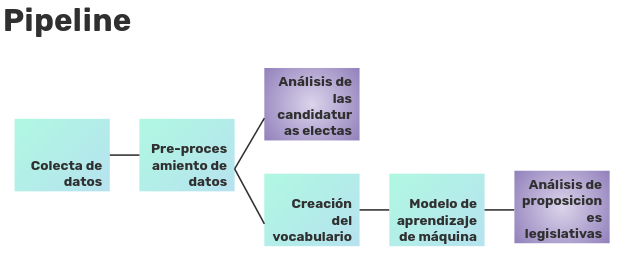

In [125]:
import matplotlib.pyplot as plt

## 1. ¿Hubo impacto positivo en la cantidad de mujeres elegidas para la Cámara en las 3 legislaciones subsecuentes a aprobación de la Ley 9.504/1997?
**Hipótesis:** No huvo impacto positivo en el percentual de mujeres elegidas para la Cámara en las 3 legislaciones subsecuentes a aprobación de la Ley 9.504/1997.

In [126]:
df_legislaturas = pd.read_csv('dados/legislaturas_1934_2023_limpas(1).csv')

In [127]:
df_legislaturas.head()

,id,uri,dataInicio,dataFim
0,56,https://dadosabertos.camara.leg.br/api/v2/legi...,2019,2023
1,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015,2019
2,54,https://dadosabertos.camara.leg.br/api/v2/legi...,2011,2015
3,53,https://dadosabertos.camara.leg.br/api/v2/legi...,2007,2011
4,52,https://dadosabertos.camara.leg.br/api/v2/legi...,2003,2007


<div class="alert-warning">Determinar el período de los datos para el análisis (1995 a 2007)</div>

In [128]:
legislaturas_h1 = df_legislaturas[(df_legislaturas['id'] >= 50) & (df_legislaturas['id'] <= 53)]['id'].unique().tolist()

In [129]:
df_candidaturas_eleitas = pd.read_csv('dados/candidaturas_eleitas(1).csv')

In [130]:
df_candidaturas_eleitas_h1 = df_candidaturas_eleitas[df_candidaturas_eleitas['idLegislatura'].isin(legislaturas_h1)].copy()

In [131]:
df_candidaturas_eleitas_h1['idLegislatura'].unique()

array([53, 52, 51, 50])

<div class="alert-warning">Agrupar por género</div>

In [132]:
agrupa_sexo = df_candidaturas_eleitas_h1.groupby(['idLegislatura', 'sexo']).size().to_frame('valorAbsoluto')

<div class="alert-warning">Estabelece el porcentaje de cada grupo en relación al total de diputados</div>

In [133]:
agrupa_sexo['porcentagem'] = round(agrupa_sexo['valorAbsoluto'].div(
                                agrupa_sexo.groupby('idLegislatura')['valorAbsoluto'].transform('sum')).mul(100), 2)

In [134]:
agrupa_sexo_df = agrupa_sexo.reset_index()

In [135]:
agrupa_sexo_df

,idLegislatura,sexo,valorAbsoluto,porcentagem
0,50,F,42,6.61
1,50,M,593,93.39
2,51,F,39,6.07
3,51,M,603,93.93
4,52,F,52,8.27
5,52,M,577,91.73
6,53,F,52,8.05
7,53,M,594,91.95


<div class="alert-warning">Prepara los datos para visualización</div>

In [136]:
mulher_h1 = agrupa_sexo_df[agrupa_sexo_df['sexo'] == 'F']['porcentagem'].tolist()
homem_h1 = agrupa_sexo_df[agrupa_sexo_df['sexo'] == 'M']['porcentagem'].tolist()

In [137]:
legislaturas_lista_h1 = agrupa_sexo_df['idLegislatura'].unique()

In [138]:
legislaturas_lista_h1 = df_legislaturas[(df_legislaturas['id'] >= 50) & 
                                        (df_legislaturas['id'] <= 53)]['dataInicio'].unique().tolist()
legislaturas_lista_h1.sort()

In [139]:
legislaturas_lista_h1 = list(map(str, legislaturas_lista_h1))
legislaturas_lista_h1

['1995', '1999', '2003', '2007']

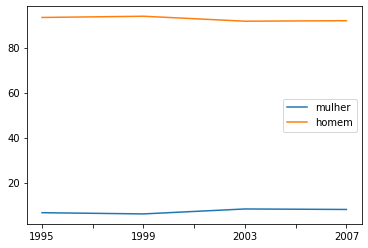

In [140]:
agrupa_sexo_df2 = pd.DataFrame({'mulher': mulher_h1,
                               'homem': homem_h1
                               }, index=legislaturas_lista_h1,
                              )
agrupa_sexo_df2.plot.line()
agrupa_sexo_df2.to_csv('dados/analise_genero_1995_2007(1).csv')

<div class="alert-warning">Visualización por género</div>

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

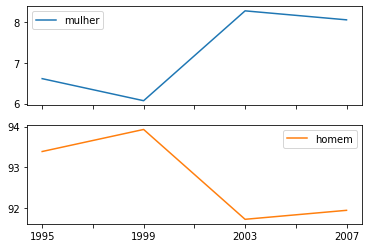

In [141]:
agrupa_sexo_df2.plot.line(subplots=True)

In [142]:
diferenca_percentual_mulher_h1_total = mulher_h1[-1] - mulher_h1[0]

In [143]:
print(f'''
Hubo impacto positivo en la cantidad de mujeres elegidas para la Cámara en las 3 legislaciones subsecuentes a aprobación de la Ley 9.504/1997? \n 
Hipótesis comprobada? Sí. \n
Hubo aumento de  {round(diferenca_percentual_mulher_h1_total, 2)}% en el total de mujeres elegidas, sin embargo es un porcentaje muy bajo para justificar como impacto positivo.
''')


Hubo impacto positivo en la cantidad de mujeres elegidas para la Cámara en las 3 legislaciones subsecuentes a aprobación de la Ley 9.504/1997? 
 
Hipótesis comprobada? Sí. 

Hubo aumento de  1.44% en el total de mujeres elegidas, sin embargo es un porcentaje muy bajo para justificar como impacto positivo.



## 2. ¿Hubo impacto positivo en la cantidad de mujeres elegidas para la Cámara en las 3 legislaciones subsecuentes a aprobación de la Ley 12.034/2009?
**Hipótesis:** Huvo impacto positivo en el percentual de mujeres elegidas para la Cámara en las 3 legislaciones subsecuentes a aprobación de la Ley 12.034/2009.

<div class="alert-warning">Determinar el período de los datos para el análisis (2007 a 2019)</div>

In [144]:
legislaturas_h2 = df_legislaturas[(df_legislaturas['id'] >= 53) & (df_legislaturas['id'] <= 56)]['id'].unique().tolist()

In [145]:
df_candidaturas_eleitas_h2 = df_candidaturas_eleitas[df_candidaturas_eleitas['idLegislatura'].isin(legislaturas_h2)].copy()

In [146]:
df_candidaturas_eleitas_h2['idLegislatura'].unique()

array([56, 55, 54, 53])

<div class="alert-warning">Agrupar por género</div>

In [147]:
agrupa_sexo_h2 = df_candidaturas_eleitas_h2.groupby(['idLegislatura', 'sexo']).size().to_frame('valorAbsoluto')

<div class="alert-warning">Estabelece el porcentaje de cada grupo en relación al total de diputados</div>

In [148]:
agrupa_sexo_h2['porcentagem'] = round(agrupa_sexo_h2['valorAbsoluto'].div(agrupa_sexo_h2.groupby(
                                    'idLegislatura')['valorAbsoluto'].transform('sum')).mul(100), 2)

In [149]:
agrupa_sexo_h2_df = agrupa_sexo_h2.reset_index()

In [150]:
agrupa_sexo_h2

valorAbsoluto  porcentagem
idLegislatura sexo                            
53            F                52         8.05
              M               594        91.95
54            F                60         8.94
              M               611        91.06
55            F                66        10.43
              M               567        89.57
56            F                87        14.57
              M               510        85.43

<div class="alert-warning">Prepara los datos para visualización</div>

In [151]:
mulher_h2 = agrupa_sexo_h2_df[agrupa_sexo_h2_df['sexo'] == 'F']['porcentagem'].tolist()
homem_h2 = agrupa_sexo_h2_df[agrupa_sexo_h2_df['sexo'] == 'M']['porcentagem'].tolist()

In [152]:
legislaturas_lista_h2 = agrupa_sexo_h2_df['idLegislatura'].unique()

In [153]:
legislaturas_lista_h2 = df_legislaturas[(df_legislaturas['id'] >= 53) & (df_legislaturas['id'] <= 56)
                                       ]['dataInicio'].unique().tolist()
legislaturas_lista_h2.sort()

In [154]:
legislaturas_lista_h2 = list(map(str, legislaturas_lista_h2))
legislaturas_lista_h2

['2007', '2011', '2015', '2019']

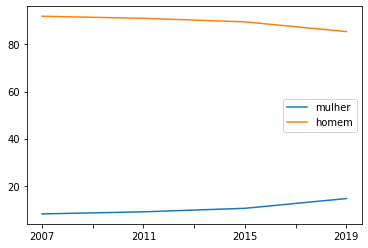

In [155]:
agrupa_sexo_h2_df2 = pd.DataFrame({'mulher': mulher_h2,
                               'homem': homem_h2
                               }, index=legislaturas_lista_h2,
                              )
agrupa_sexo_h2_df2.plot.line()
agrupa_sexo_h2_df2.to_csv('dados/analise_genero_2007_2019(1).csv')

<div class="alert-warning">Visualización por género</div>

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

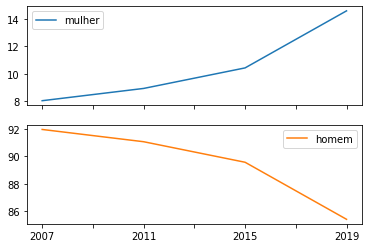

In [156]:
agrupa_sexo_h2_df2.plot.line(subplots=True)

In [157]:
diferenca_percentual_mulher_h2_total = mulher_h2[-1] - mulher_h2[0]

In [158]:
print(f'''
Hubo impacto positivo en la cantidad de mujeres elegidas para la Cámara en las 3 legislaciones subsecuentes a aprobación de la Ley 12.034/2009? \n 
Hipótesis comprobada? Sí. \n
Hubo aumento de  {round(diferenca_percentual_mulher_h2_total, 2)}% en el total de mujeres elegidas.
''')


Hubo impacto positivo en la cantidad de mujeres elegidas para la Cámara en las 3 legislaciones subsecuentes a aprobación de la Ley 12.034/2009? 
 
Hipótesis comprobada? Sí. 

Hubo aumento de  6.52% en el total de mujeres elegidas.



## Evolução geral

In [247]:
legislaturas_todas = df_candidaturas_eleitas['idLegislatura'].unique()
legislaturas_todas

array([56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40,
       39, 38, 37, 36])

<div class="alert-warning">Agrupar por género</div>

In [248]:
agrupa_sexo_todas = df_candidaturas_eleitas.groupby(['idLegislatura', 'sexo']).size().to_frame('valorAbsoluto')

<div class="alert-warning">Estabelece el porcentaje de cada grupo en relación al total de diputados</div>

In [249]:
agrupa_sexo_todas['porcentagem'] = round(agrupa_sexo_todas['valorAbsoluto'].div(agrupa_sexo_todas.groupby(
                                    'idLegislatura')['valorAbsoluto'].transform('sum')).mul(100), 2)

In [250]:
agrupa_sexo_todas_df = agrupa_sexo_todas.reset_index()

In [251]:
agrupa_sexo_todas_df

,idLegislatura,sexo,valorAbsoluto,porcentagem
0,36,F,1,0.38
1,36,M,262,99.62
2,37,F,2,0.70
3,37,M,284,99.30
4,38,M,379,100.00
5,39,F,1,0.25
6,39,M,398,99.75
7,40,F,2,0.45
8,40,M,442,99.55
9,41,F,1,0.22


<div class="alert-warning">Prepara los datos para visualización</div>

In [258]:
mulher_todas = agrupa_sexo_todas_df[agrupa_sexo_todas_df['sexo'] == 'F']['porcentagem'].tolist()
homem_todas = agrupa_sexo_todas_df[agrupa_sexo_todas_df['sexo'] == 'M']['porcentagem'].tolist()

In [259]:
len(mulher_todas), len(homem_todas)

(20, 21)

In [263]:
mulher_todas[:5]

[0.38, 0.7, 0, 0.25, 0.45]

In [261]:
mulher_todas.insert(2, 0)

In [264]:
len(mulher_todas), len(homem_todas)

(21, 21)

In [265]:
mulher_todas[:5]

[0.38, 0.7, 0, 0.25, 0.45]

In [266]:
legislaturas_lista_todas = agrupa_sexo_todas_df['idLegislatura'].unique()

In [267]:
legislaturas_lista_todas = df_legislaturas['dataInicio'].unique().tolist()
legislaturas_lista_todas.sort()

In [268]:
legislaturas_lista_todas = list(map(str, legislaturas_lista_todas))

In [269]:
len(legislaturas_lista_todas), len(mulher_todas), len(homem_todas)

(21, 21, 21)

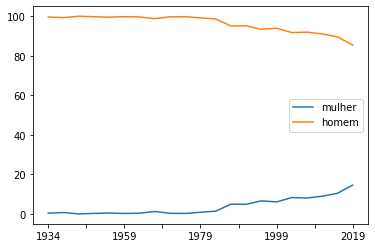

In [270]:
agrupa_sexo_todas_df2 = pd.DataFrame({'mulher': mulher_todas,
                               'homem': homem_todas
                               }, index=legislaturas_lista_todas,
                              )
agrupa_sexo_todas_df2.plot.line()
agrupa_sexo_todas_df2.to_csv('dados/analise_genero_1934_2023.csv')

<div class="alert-warning">Visualización por género</div>

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

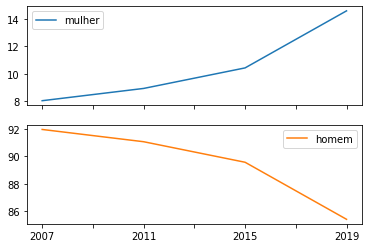

In [169]:
agrupa_sexo_h2_df2.plot.line(subplots=True)

## 3. ¿Teniendo en cuenta el tema de las proposiciones legislativas, hubo aumento de los que beneficia grupos históricamente marginados en el periodo entre 1934 y 2021?
**Hipótesis:** Sí, hubo aumento en la cantidade anual de propuestas legislativas que beneficia los grupos historicamente marginados.

In [171]:
proposicoes = pd.read_csv('dados/proposicoes_legislativas_limpas_classificadas(1).csv')

In [172]:
proposicoes.head()

,id,siglaTipo,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords,temas_classificador
0,168293,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM DECISÃO DENEGATORIA DO TRIBUNAL DE CONT...,NaN,"manutenção,decisão,tribunal,contas,união,tcu,d...",NaN
1,168297,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM ATO DO TRIBUNAL DE CONTAS DA UNIÃO DE R...,NaN,"manutenção,ato,tribunal,contas,união,tcu,recus...",NaN
2,168300,PDC,1965,135,Projeto de Decreto Legislativo,MANTÉM DECISÃO DENEGATÓRIA DO TRIBUNAL DE CONT...,NaN,"manutenção,decisão,tribunal,contas,união,tcu,d...",NaN
3,168303,PDC,1965,135,Projeto de Decreto Legislativo,MANTÉM ATO DO TRIBUNAL DE CONTAS DA UNIÃO QUE ...,NaN,"manutenção,ato,tribunal,contas,união,tcu,negaç...",NaN
4,168307,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM O ATO DO TRIBUNAL DE CONTAS DA UNIÃO QU...,NaN,"manutenção,ato,tribunal,contas,união,tcu,deneg...",NaN


<div class="alert-warning">Agrupa por año y cantidad de propuestas de los temas</div>

In [173]:
proposicoes_anuais = proposicoes[['ano', 'temas_classificador']].groupby(by=['ano']).count()

In [174]:
proposicoes_anuais.tail(10)

,temas_classificador
ano,
2012,454
2013,825
2014,363
2015,660
2016,398
2017,519
2018,395
2019,804
2020,506


<div class="alert-warning">Visualización</div>

<AxesSubplot:xlabel='ano'>

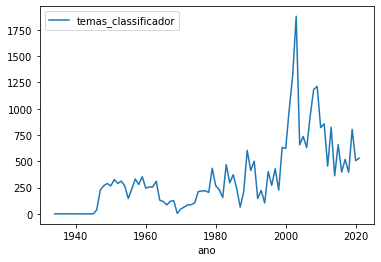

In [175]:
proposicoes_anuais.plot.line()

In [176]:
proposicoes_anuais = proposicoes_anuais.reset_index()
proposicoes_anuais.to_csv('dados/proposicoes_anuais(1).csv', index=False)

In [1]:
print(f'''
Teniendo en cuenta el tema de las proposiciones legislativas, hubo aumento de los que beneficia grupos historicamente marginalinados en el periodo entre 1934 e 2021? \n
Hipótesis comprobada? Sí.
Apesar de las oscilaciones hay una tendencia de crecimiento positivo en la cantidad de propuestas que benefician los grupos historicamente marginados.
''')


Teniendo en cuenta el tema de las proposiciones legislativas, hubo aumento de los que beneficia grupos historicamente marginalinados en el periodo entre 1934 e 2021? 

Hipótesis comprobada? Sí.
Apesar de las oscilaciones hay una tendencia de crecimiento positivo en la cantidad de propuestas que benefician los grupos historicamente marginados.



## 4. ¿Cuál es el coeficiente de correlación entre la cantidad anual de las propuestas legislativas que benefician los grupos historicamente marginados y el porcentaje de mujeres elegidas para la Cámara de Diputados entre 1995 y 2019?
**Hipótesis:** Bajo

<div class="alert-warning">Une los dataframes de los análisis anteriores</div>

In [178]:
analise_genero_1995_2007 = pd.read_csv('dados/analise_genero_1995_2007(1).csv')
analise_genero_2007_2019 = pd.read_csv('dados/analise_genero_2007_2019(1).csv')

In [179]:
analise_genero_1995_2007.columns == analise_genero_2007_2019.columns

array([ True,  True,  True])

In [180]:
analise_genero_1995_2019 = pd.concat([analise_genero_1995_2007, analise_genero_2007_2019], ignore_index=True)

In [181]:
analise_genero_1995_2019

,Unnamed: 0,mulher,homem
0,1995,6.61,93.39
1,1999,6.07,93.93
2,2003,8.27,91.73
3,2007,8.05,91.95
4,2007,8.05,91.95
5,2011,8.94,91.06
6,2015,10.43,89.57
7,2019,14.57,85.43


In [182]:
analise_genero_1995_2019.rename(columns={'Unnamed: 0': 'ano'}, inplace=True)

In [183]:
analise_genero_1995_2019.drop(index=3, inplace=True)

In [184]:
analise_genero_1995_2019

,ano,mulher,homem
0,1995,6.61,93.39
1,1999,6.07,93.93
2,2003,8.27,91.73
4,2007,8.05,91.95
5,2011,8.94,91.06
6,2015,10.43,89.57
7,2019,14.57,85.43


In [185]:
anos = analise_genero_1995_2019['ano'].tolist()
anos.append(2021)
anos

[1995, 1999, 2003, 2007, 2011, 2015, 2019, 2021]

<div class="alert-warning">Inserta el período completo de cada legislatura, teniendo en cuenta que la proporcionalidade de género se mantiene durante los 4 años de legislatura</div>

In [186]:
for ano in anos:
    mulher_percentual = analise_genero_1995_2019['mulher'][analise_genero_1995_2019['ano'] == ano].item()
    homem_percentual = analise_genero_1995_2019['homem'][analise_genero_1995_2019['ano'] == ano].item()
    if ano < 2021:
        dados = pd.DataFrame(data={
            'ano': [ano+1, ano+2, ano+3], 
            'mulher': [mulher_percentual, mulher_percentual, mulher_percentual], 
            'homem': [homem_percentual, homem_percentual, homem_percentual]}
                            )
        analise_genero_1995_2019 = pd.concat([analise_genero_1995_2019, dados])

In [187]:
analise_genero_1995_2019.sort_values(by=['ano'], inplace=True)

In [188]:
analise_genero_1995_2019.reset_index(drop=True, inplace=True)

In [189]:
analise_genero_1995_2019.tail()

,ano,mulher,homem
23,2018,10.43,89.57
24,2019,14.57,85.43
25,2020,14.57,85.43
26,2021,14.57,85.43
27,2022,14.57,85.43


In [190]:
analise_genero_1995_2019.drop(index=27, inplace=True)    

<div class="alert-warning">Inserta el total anual de las propuestas en favor a los grupos historicamente marginados</div>

In [191]:
def insere_qnt_propostas(ano_candidaturas_eleitas):
    for ano, qnt_tema in zip(proposicoes_anuais['ano'], proposicoes_anuais['temas_classificador']):
        if ano == ano_candidaturas_eleitas:
            return qnt_tema

In [192]:
analise_genero_1995_2019['qnt_proposicoes'] = analise_genero_1995_2019['ano'].apply(insere_qnt_propostas)

In [193]:
analise_genero_1995_2019.head(10)

,ano,mulher,homem,qnt_proposicoes
0,1995,6.61,93.39,403
1,1996,6.61,93.39,271
2,1997,6.61,93.39,430
3,1998,6.61,93.39,226
4,1999,6.07,93.93,633
5,2000,6.07,93.93,623
6,2001,6.07,93.93,990
7,2002,6.07,93.93,1316
8,2003,8.27,91.73,1880
9,2004,8.27,91.73,657


<div class="alert-warning">Cría la matriz de correlación</div>

In [194]:
correlacao = analise_genero_1995_2019[['mulher', 'homem', 'qnt_proposicoes']].corr(method='pearson')

In [195]:
coeficiente_correlacao_mulher_qnt_temas = round(correlacao['mulher']['qnt_proposicoes'],2)

In [196]:
correlacao_matriz_triangular = np.triu(np.ones_like(correlacao))

<AxesSubplot:>

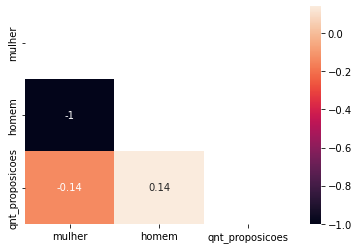

In [197]:
sns.heatmap(correlacao, annot=True, mask=correlacao_matriz_triangular)

In [198]:
correlacao.to_csv('dados/coeficiente_correlacao_mulher_qnt_temas(1).csv')

In [199]:
print(f'''¿Cuál es el coeficiente de correlación entre la cantidad anual de las propuestas legislativas que benefician los grupos historicamente marginados y el porcentaje de mujeres elegidas para la 
Cámara de Diputados entre 1995 y 2019?\n 
Hipótesis comprobada? Sí. \n
- El coeficiente de correlación de Pearson es {coeficiente_correlacao_mulher_qnt_temas}, por lo tanto no se puede afirmar que hay correlación.
''')

¿Cuál es el coeficiente de correlación entre la cantidad anual de las propuestas legislativas que benefician los grupos historicamente marginados y el porcentaje de mujeres elegidas para la 
Cámara de Diputados entre 1995 y 2019?
 
Hipótesis comprobada? Sí. 

- El coeficiente de correlación de Pearson es -0.14, por lo tanto no se puede afirmar que hay correlación.

